In [ ]:
### Check Working directory

import os
print("Working dir: ", os.getcwd())

os.chdir(os.pardir)         # change working dir to parents dir
print("Changed dir: ", os.getcwd())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# read raw data
df_raw = pd.read_excel('raw_data/refined_data.xlsx')

# read club data
file_path = 'result/res_cosine_club.xlsx'
df_club = pd.read_excel(file_path, sheet_name = 'Sheet4')


"""
print(df_raw.shape[0] + 1)
print(df_club.iloc[49])

df_raw.loc[251] = df_club.loc[49]
print(df_raw)
df_raw.loc[251, 'ID'] = 'club_1'
print(df_raw)
"""


def merge(data1, data2, num_club):
    num_data1 = data1.shape[0]
    data1.loc[num_data1] = data2.iloc[num_club]
    data1.loc[250, 'ID'] = num_club
    return data1


def cos_sim_club(data):
    # except first column
    features = data.iloc[:, 1:].values
    
    # sim calc 251 row between 1 ~ 250
    reference_row = features[250].reshape(1, -1)  
    comparison_rows = features[:250]
    
    # Calculate cosine similarity between 251 row 1~250 row
    cosine_similarities = cosine_similarity(reference_row, comparison_rows)[0]
    
    # save result
    similarity_result = []
    for i, sim in enumerate(cosine_similarities):
        similarity_result.append([251, i + 1, sim])
    
    # save as DataFrame
    return pd.DataFrame(similarity_result, columns=["Row1", "Row2", "Cosine Similarity"])



df_mg = merge(df_raw, df_club, 49)
print(df_mg)

cosine_similarity_matrix = cos_sim_club(df_mg)
print(cosine_similarity_matrix)


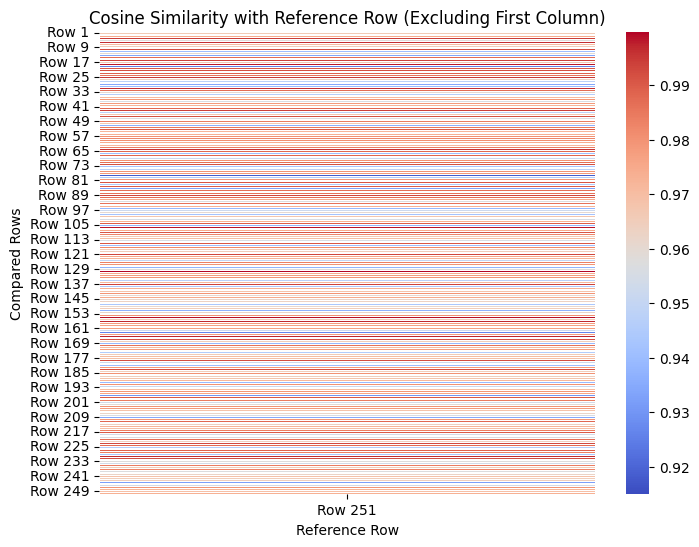

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_with_single_reference(df, reference_idx):

    features = df.iloc[:, 1:].values
    

    reference_row = features[reference_idx].reshape(1, -1)
    comparison_rows = features[:reference_idx]  # 1~reference_idx-1까지의 행
    

    cosine_sim = cosine_similarity(reference_row, comparison_rows)[0]
    

    similarity_df = pd.DataFrame(cosine_sim, index=[f"Row {i+1}" for i in range(reference_idx)], columns=[f"Row {reference_idx+1}"])
    
    return similarity_df


similarity_df = cosine_similarity_with_single_reference(df_mg, reference_idx=250)


plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Cosine Similarity with Reference Row (Excluding First Column)')
plt.xlabel('Reference Row')
plt.ylabel('Compared Rows')
plt.show()
